# Phase 3 Project Submission

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones
- Blog post URL:

# Diabetes Risk Assessment and Prediction

## Project Overview

For this project I sought to develop predictive models to identify individuals who are at higher risk of developing diabetes based on an array of health-related characteristics. Using this data and predictive models, health-care practicioners can improve patient outcomes by improving early diagnosis/ detection and preemptively implementing personalized treatment strategies for treatment and prevention of diabetes.


## Business Problem and Stakeholder

A healthcare practice group is looking to improve diabetes diagnosis, improve prognosis of those who are diagnosed and aid assist patients looking to prevent diabetes. Utilizing this data, providers will be able to look for early detection signs of diabetes and then implement corrective strategies early on in the diesease process to either improve the patients outcome and health with the disease or prevent it altogether. Utilizing my model, the goal is to assist practicioners with early detection by identifying which health-related attributes such as blood pressure, glucose levels, insulin levels, BMI, age and other factors are more predictive or increase the risk of diabetes.

## Data Understanding

For this project, I will be looking at a dataset which is derived from a 2016 research study out of China which contains information regarding various health factors and diabetic status of the reserach population. The dataset was collected in accordance with health indicators and health standards from the World Health Organization. 

In [1]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Importing packages for statistics and modeling
import statsmodels.api as sm
import sklearn.metrics as metrics
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve , log_loss
from imblearn.over_sampling import SMOTE
from scipy.stats import kstest

from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)




In [2]:
# Loading Dataset
diabetes = pd.read_csv('diabetes_2.csv')

# Previewing general information on dataset
print(diabetes.info())

#Previewing first 5 rows 
diabetes.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


Initially we have 4303 entries (rows) with 18 columns representing the feature variables and target variable. The data types of the columns are either integers or floats indicating that all columns are numeric in nature. Even with all columns being numeric, there are columns such as smoking, drinking, family_histroy, gender and Diabetes which are categorical variables. Looking further into our dataset, the column Diabetes is a binary classification variable. This is the target variable in which a value of 0 represents absence of diabetes and a value of 1 represents presence of diabetes.

In [3]:
# Dropping any duplicate rows 
diabetes = diabetes.drop_duplicates()

# Checking for missing values
diabetes.isna().sum()

Age               0
Gender            0
BMI               0
SBP               0
DBP               0
FPG               0
Chol              0
Tri               0
HDL               0
LDL               0
ALT               0
BUN               0
CCR               0
FFPG              0
smoking           0
drinking          0
family_histroy    0
Diabetes          0
dtype: int64

In [4]:
#Getting value_counts for whole dataset
for col in diabetes:
        print (diabetes[col].value_counts())

34    169
33    137
35    137
37    128
29    121
     ... 
91      2
90      2
23      2
22      2
93      1
Name: Age, Length: 70, dtype: int64
1    2790
2    1513
Name: Gender, dtype: int64
23.50    62
23.40    59
26.00    59
24.80    56
26.10    55
         ..
27.48     1
19.47     1
20.76     1
26.06     1
32.50     1
Name: BMI, Length: 275, dtype: int64
122    107
111    106
123    104
129    103
110    103
      ... 
191      1
186      1
190      1
198      1
72       1
Name: SBP, Length: 111, dtype: int64
72     191
77     190
73     156
76     153
74     147
      ... 
126      1
134      1
47       1
111      1
48       1
Name: DBP, Length: 75, dtype: int64
5.10    97
5.00    93
4.90    77
5.20    71
5.30    71
        ..
2.95     1
3.57     1
3.64     1
3.27     1
3.70     1
Name: FPG, Length: 361, dtype: int64
4.00    70
4.50    49
5.00    47
4.60    41
4.20    40
        ..
6.51     1
8.25     1
7.25     1
2.61     1
2.93     1
Name: Chol, Length: 486, dtype: int64
1.00  

When looking over the values, units for glucose measurements(FPG, FFPG)and lipid measurements (Chol, Tri, HDL, LDL) are presented in metric units (mmol). While initially there seems to be no null/missing values, upon review of value counts there is an abnormal value, 4.860753, that seems to be common in most columns. This may be a placeholder for missing values. This will need to be addressed.

Regarding the target variable of the Diabetes column, there are 3000 entries showing no diabetes diagnosis while 1303 indicate a diabetes diagnosis.


## Data Preparation/ Preprocessing

Since it was discovered that multiple columns seem to have the same placeholder value of 4.860753, the dataset will be filtered to remove any rows that contain that value as we can assume this maybe a placeholder for missing values. 

In [5]:
# Dealing with missing and non-numeric data
# Do not fit transformer to test data/ fit to training data and instead
# use it to transform both train and test data
# Scaling 

#Feature engineering encrouaged but not required
# Exceeds objective: using feature engineering or pipelines

In [6]:
# Create a new DataFrame to store the filtered data
filtered_diabetes = diabetes.copy()

# Value to drop
value_to_drop = 4.860753

# Loop through the columns and drop rows containing the value
for col in diabetes.columns:
    filtered_diabetes = filtered_diabetes[filtered_diabetes[col] != value_to_drop]

# Reset the index of the filtered DataFrame
filtered_diabetes.reset_index(drop=True, inplace=True)

# Renaming columns for fluid formatting
filtered_diabetes.rename(columns={'family_histroy': 'Family_History',
                                  'smoking': 'Smoking', 'drinking': 'Drinking'}, inplace=True)


# Print the filtered DataFrame
print(filtered_diabetes)


      Age  Gender   BMI  SBP  DBP   FPG  Chol   Tri   HDL   LDL   ALT   BUN  \
0      26       1  20.1  119   81  5.80  4.36  0.86  0.90  2.43  12.0  5.40   
1      40       1  17.7   97   54  4.60  3.70  1.02  1.50  2.04   9.2  3.70   
2      40       2  19.7   85   53  5.30  5.87  1.29  1.75  3.37  10.1  4.10   
3      43       1  23.1  111   71  4.50  4.05  0.74  1.27  2.60  36.5  4.38   
4      36       1  26.5  130   82  5.54  6.69  3.49  0.91  3.64  69.3  3.86   
...   ...     ...   ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   
3255   77       1  22.9  134   73  5.52  4.02  1.28  1.23  2.25  42.2  4.34   
3256   54       1  23.4  126   75  6.82  5.00  1.50  1.24  2.98   8.0  3.50   
3257   67       1  24.6  138   81  4.85  3.89  1.38  1.14  2.17  18.1  4.73   
3258   60       2  29.0  101   60  6.70  5.91  1.29  1.73  2.85  18.9  7.33   
3259   37       1  34.3  120   71  4.97  5.42  2.66  1.08  2.87  81.0  4.61   

       CCR  FFPG  Smoking  Drinking  Family_History

In [7]:
# Creating new df from filtered dataset
diabetes_df = filtered_diabetes.copy()
diabetes_df.info()

# Getting number of patients with and without diabetes
print(diabetes_df['Diabetes'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             3260 non-null   int64  
 1   Gender          3260 non-null   int64  
 2   BMI             3260 non-null   float64
 3   SBP             3260 non-null   int64  
 4   DBP             3260 non-null   int64  
 5   FPG             3260 non-null   float64
 6   Chol            3260 non-null   float64
 7   Tri             3260 non-null   float64
 8   HDL             3260 non-null   float64
 9   LDL             3260 non-null   float64
 10  ALT             3260 non-null   float64
 11  BUN             3260 non-null   float64
 12  CCR             3260 non-null   float64
 13  FFPG            3260 non-null   float64
 14  Smoking         3260 non-null   float64
 15  Drinking        3260 non-null   float64
 16  Family_History  3260 non-null   int64  
 17  Diabetes        3260 non-null   i

After cleaning and preparation the cleaned dataset now contains 3260 rows with 18 columns containing numerical data types. Our target variable is the presence of diabetes which is indicated by the "Diabetes" column. Our independent, or feature, variables contain various health and lifestyle indicators ranging from numerical columns containing lab values of various health markers to categorical columns, such as smoking, drinking, and gender.

## Data Analysis/ Data Visualization

Diabetes          1.000000
FFPG              0.525417
FPG               0.362254
Age               0.337337
SBP               0.190874
BMI               0.157559
Tri               0.115426
DBP               0.113250
BUN               0.103984
Chol              0.098017
Family_History    0.074080
LDL               0.072715
ALT               0.068399
Drinking          0.029131
CCR               0.016781
Gender           -0.067812
HDL              -0.083152
Smoking          -0.101890
Name: Diabetes, dtype: float64


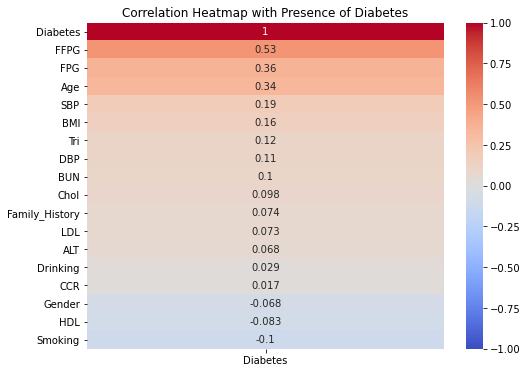

In [8]:
# Checking correlations between feature variables and target variables
print(diabetes_df.corr()["Diabetes"].sort_values(ascending = False))

# Heatmap showing correlations
plt.figure(figsize=(8, 6))
sns.heatmap(diabetes_df.corr()[['Diabetes']].sort_values(by='Diabetes', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with Presence of Diabetes')
plt.show()

Looking at the correlations of the current variables we see that the top 3 highest correlates are:

- FFPG (Final Fasting Plasma Glucose): highest correlation at 0.53
- FPG (Fasting Plasma Glucose): 2nd highest correlation at 0.36
- Age: 3rd highest correlation at 0.34

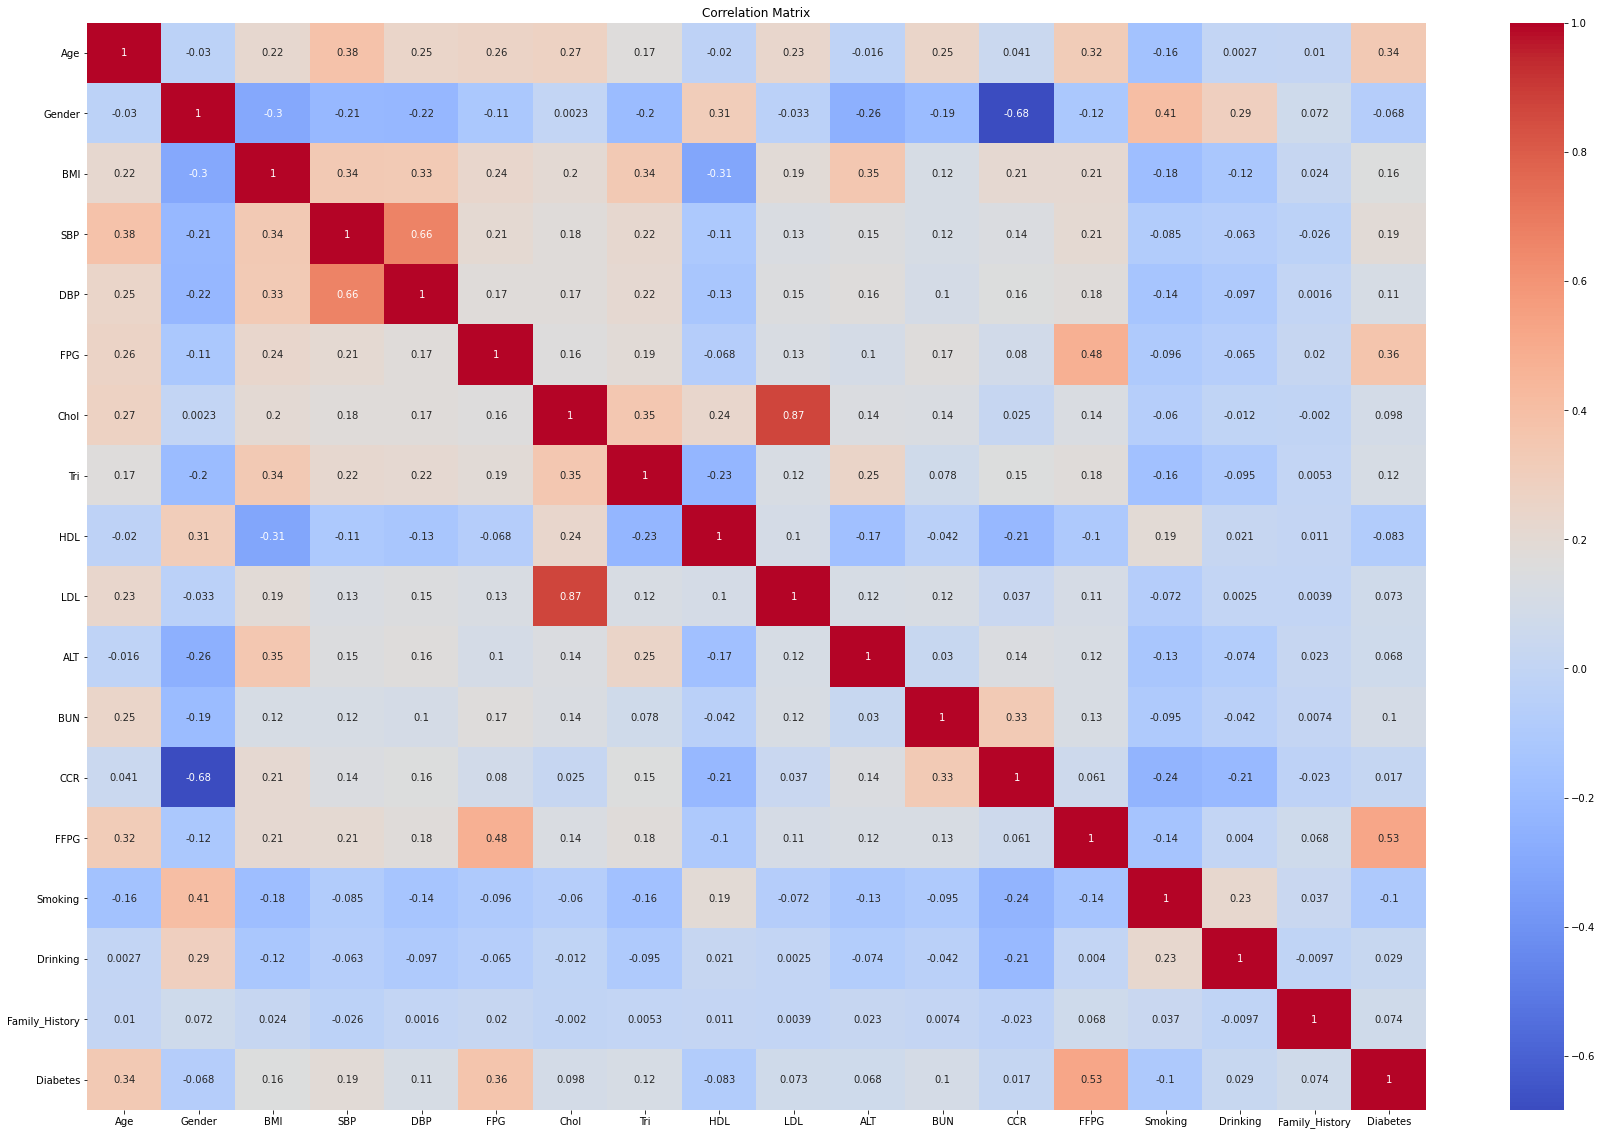

In [9]:
#Generating Correlation matrix
corr_matrix = diabetes_df.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

Upon looking at the correlation matrix, two relationships standout which include:

- CHOL and LDL: 0.87
- SBP and DBP: 0.66

I will leave these variables in for the current time being for the baseline model. May need to address these in future iterations.

In [10]:
# Getting descriptive statistics on dataset 
diabetes_df.describe()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,Smoking,Drinking,Family_History,Diabetes
count,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000,3260.000000
mean,44.375767,1.339877,23.748322,120.870859,75.479448,5.032417,4.811337,1.489951,1.336433,2.763920,26.321748,4.755699,72.383985,5.323294,2.530982,2.776380,0.062270,0.079755
std,13.459344,0.473740,3.321371,16.224157,10.542970,0.668683,0.914609,1.233862,0.314090,0.690399,22.658506,1.213527,15.350584,0.915552,0.823085,0.471977,0.241682,0.270954
min,22.000000,1.000000,15.600000,72.000000,47.000000,2.840000,1.650000,0.000000,0.000000,0.540000,4.500000,1.380000,35.600000,3.570000,1.000000,1.000000,0.000000,0.000000
25%,34.000000,1.000000,21.300000,109.000000,68.000000,4.610000,4.160000,0.800000,1.110000,2.290000,14.000000,3.890000,60.700000,4.827500,2.000000,3.000000,0.000000,0.000000
50%,41.000000,1.000000,23.500000,120.000000,75.000000,5.000000,4.740000,1.200000,1.300000,2.700000,20.000000,4.630000,73.000000,5.160000,3.000000,3.000000,0.000000,0.000000
75%,53.000000,2.000000,25.900000,131.000000,82.000000,5.400000,5.380000,1.820000,1.530000,3.182500,30.600000,5.490000,82.900000,5.510000,3.000000,3.000000,0.000000,0.000000
max,93.000000,2.000000,37.000000,189.000000,134.000000,6.990000,11.650000,32.640000,3.870000,6.270000,436.200000,14.640000,214.400000,20.600000,3.000000,3.000000,1.000000,1.000000


In [11]:
# Getting descriptive statistics for population with Diabetes
print(diabetes_df[diabetes_df['Diabetes'] > 0].describe())

# Getting descriptive statistics for population without Diabetes 
print(diabetes_df[diabetes_df['Diabetes'] == 0].describe())

              Age      Gender         BMI         SBP         DBP         FPG  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean    59.796154    1.230769   25.525654  131.388462   79.534615    5.855115   
std     12.495280    0.422138    3.233779   20.015415   11.631187    0.788136   
min     29.000000    1.000000   16.500000   89.000000   55.000000    3.030000   
25%     52.000000    1.000000   23.300000  117.000000   72.000000    5.362500   
50%     60.000000    1.000000   25.250000  130.000000   78.000000    5.980000   
75%     68.000000    1.000000   27.600000  144.000000   86.000000    6.502500   
max     88.000000    2.000000   37.000000  189.000000  134.000000    6.990000   

             Chol         Tri         HDL         LDL         ALT         BUN  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean     5.115808    1.973654    1.247731    2.934423   31.585385    5.184269   
std      0.918990    1.4402

In [12]:
# Generating mean values per feature for both diabetic group and non-diabetic group
print(diabetes_df[diabetes_df['Diabetes'] > 0].mean())
print(diabetes_df[diabetes_df['Diabetes'] == 0].mean())

Age                59.796154
Gender              1.230769
BMI                25.525654
SBP               131.388462
DBP                79.534615
FPG                 5.855115
Chol                5.115808
Tri                 1.973654
HDL                 1.247731
LDL                 2.934423
ALT                31.585385
BUN                 5.184269
CCR                73.258846
FFPG                6.957077
Smoking             2.246154
Drinking            2.823077
Family_History      0.123077
Diabetes            1.000000
dtype: float64
Age                43.039333
Gender              1.349333
BMI                23.594287
SBP               119.959333
DBP                75.128000
FPG                 4.961117
Chol                4.784950
Tri                 1.448030
HDL                 1.344120
LDL                 2.749143
ALT                25.865567
BUN                 4.718557
CCR                72.308163
FFPG                5.181700
Smoking             2.555667
Drinking            2.772333

Looking at a general overview of the mean values between the two groups, it seems the group with a Diabetes diagnosis are generally older and have a higher SBP (Systolic Blood Pressure) along with higher values for FPG (fasting plasma glucose) and FFPG (Final Fasting Plasma Glucose).

## Data Visualization

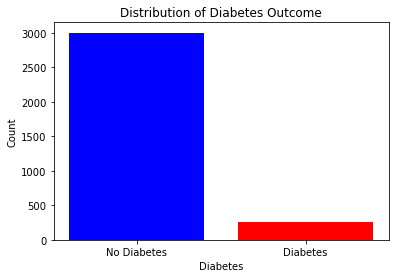

In [13]:
#Plotting visual for target variable

outcome_counts = diabetes_df['Diabetes'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(outcome_counts.index, outcome_counts.values, color=['blue', 'red'])
plt.xticks(outcome_counts.index, ['No Diabetes', 'Diabetes'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Distribution of Diabetes Outcome')
plt.show()

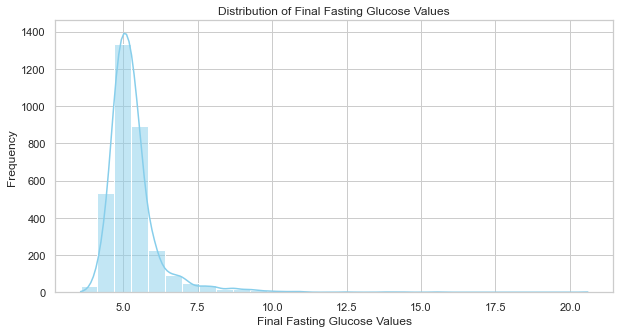

In [14]:
#Plotting a histogram to check the distribution of Final Fasting Glucose Values
#KDE--> Kernal Density Function --> Non-parametric way to estimate probably density function of the data
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_df['FFPG'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Final Fasting Glucose Values')
plt.xlabel('Final Fasting Glucose Values')
plt.ylabel('Frequency')

plt.show()

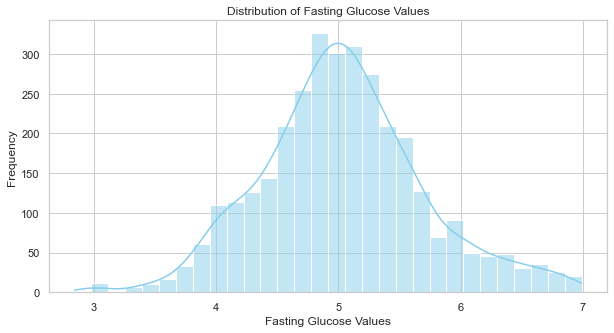

In [15]:
#Plotting a histogram to check the distribution of Fasting Plasma Glucose Values
#KDE--> Kernal Density Function --> Non-parametric way to estimate probably density function of the data
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_df['FPG'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Fasting Glucose Values')
plt.xlabel('Fasting Glucose Values')
plt.ylabel('Frequency')

plt.show()

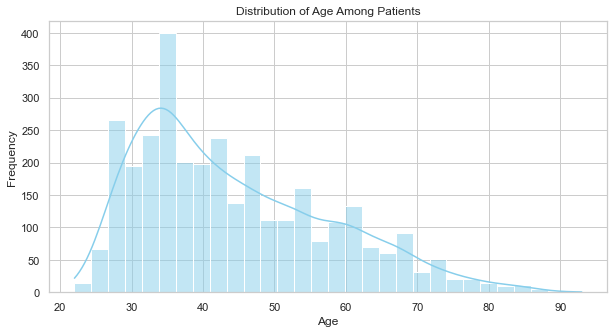

In [16]:
#Plotting a histogram to check the distribution of Age values
#KDE--> Kernal Density Function --> Non-parametric way to estimate probably density function of the data
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data= diabetes_df['Age'], kde=True, color='skyblue', bins=30)

# Adding title and labels 
plt.title('Distribution of Age Among Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

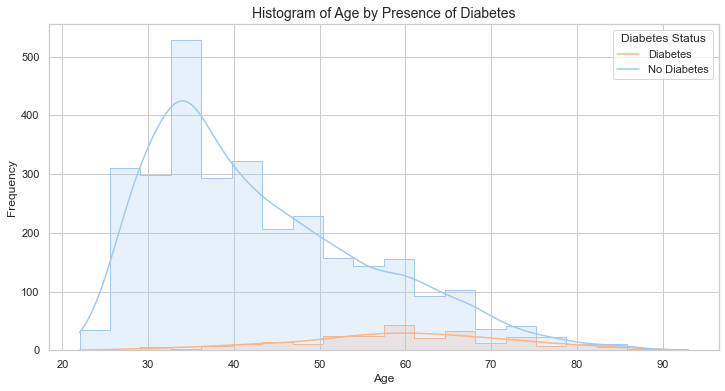

In [17]:
#Histogram of age distribution and presence of diabetes
plt.figure(figsize=(12, 6))
sns.histplot(data=diabetes_df, x='Age', hue='Diabetes', kde=True, bins=20, element='step', common_norm=False)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Age by Presence of Diabetes', fontsize=14)
plt.legend(title='Diabetes Status', labels=['Diabetes', 'No Diabetes'])
plt.show()

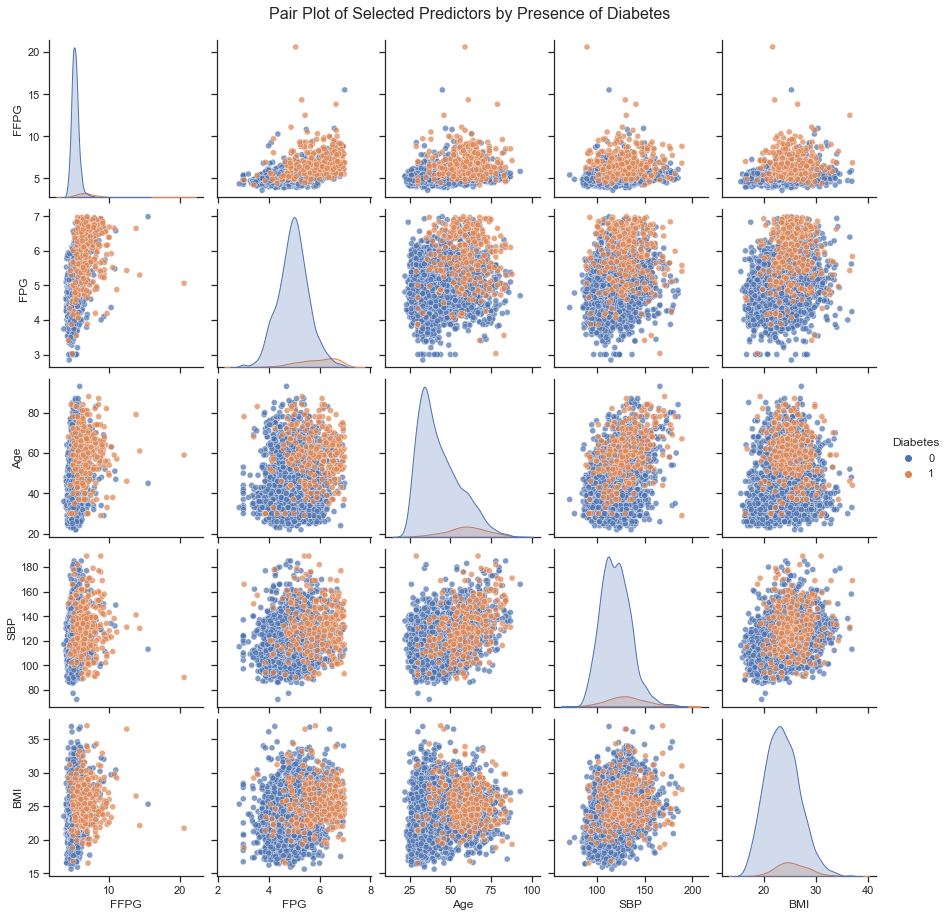

In [18]:
# Generating pairplot with selected top 5 highest correlated features

selected_predictors = ['FFPG', 'FPG', 'Age', 'SBP', 'BMI']
sns.set(style="ticks")
sns.pairplot(diabetes_df, hue='Diabetes', vars=selected_predictors, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Selected Predictors by Presence of Diabetes', fontsize=16, y=1.02)
plt.show()

## Modeling

In [19]:
# Meets Objective: uses at least 2 types of scikit learn model 
# and tunes at leats one hyperparameter in a justifiable way without any major errors
# 3 models: simple baseline model, i.e. logistic regression or single decision tree
# then a more complex model: i.e. random forest 
# version of either the simple model or more complex model with tuned hyperparameters

### Baseline Model 
#### Logistic Regession 

In [20]:
#Separating target variable from predictors
y = diabetes_df['Diabetes']
X = diabetes_df.drop('Diabetes', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Using Smote to address class imbalance with target variable 
sm = SMOTE()
X_train_resample,y_train_resample = sm.fit_resample(X_train, y_train)

# Scaling the dataset
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_resample.columns)
scaled_data.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,Smoking,Drinking,Family_History
0,-1.523205,-0.544664,-1.563848,-0.335169,-0.320076,0.327770,-0.857194,-1.217778,0.878002,-0.454930,0.254965,-0.025120,-0.229814,-0.902241,0.739443,-1.898837,-0.199908
1,1.169573,1.835994,0.802802,1.280328,-0.029321,-0.267738,0.055129,7.228199,-0.989990,-2.499519,-0.287478,-0.285276,0.439533,-0.708505,0.739443,0.490105,-0.199908
2,-1.108932,-0.544664,-1.812969,-1.777577,-0.320076,-2.067209,-0.750559,-0.046239,-0.778519,-0.665403,-0.820321,0.023659,1.043895,-0.421488,-0.476840,-1.898837,-0.199908
3,-0.280385,-0.544664,1.114203,0.357187,0.261434,0.457229,1.536172,0.916420,0.772267,1.724962,0.053349,0.300074,0.179593,-0.292331,-1.693124,-1.898837,-0.199908
4,-1.316068,1.835994,-1.408147,-1.431399,-1.192339,-0.190063,-1.876152,-1.181451,0.384570,-1.627562,-0.767516,-0.756809,-1.029132,-1.002696,0.739443,0.490105,-0.199908


In [25]:
#Instantiate the model 
baseline_model = LogisticRegression(random_state = 42)

# Fit the model to the data
baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_pred= baseline_model.predict(X_test_scaled)

# Baseline test score 
baseline_score = baseline_model.score(X_test_scaled, y_test)

# Baseline test score 
baseline_train_score = baseline_model.score(X_train_scaled, y_train_resample)

# Cross Validation
baseline_cv = cross_val_score(baseline_model, X_train_scaled, y_train_resample)


print("Baseline Training Score:", baseline_train_score)
print("Baseline Test Score:", baseline_score)
print("Cross Validation Scores:", baseline_cv)

Baseline Training Score: 0.8960462016881386
Baseline Test Score: 0.9042944785276074
Cross Validation Scores: [0.87902331 0.89567148 0.89555556 0.89333333 0.89555556]


In [26]:
# Classification report for confusion matrix 
baseline_report = classification_report(y_test, y_base_pred)
print(baseline_report)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95       749
           1       0.45      0.83      0.59        66

    accuracy                           0.90       815
   macro avg       0.72      0.87      0.77       815
weighted avg       0.94      0.90      0.92       815



In [27]:
# Creating function to take in model and data to generate evaluation score metrics
def model_scores(model, X_train, X_test, y_train, y_test):
    
    train_score = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    test_score = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    
  
    print("Model's Train Score:", train_score)
    print("Model's Test Score:", test_score)
    print("Cross Validation Scores:", cross_val_score(model, X_train, y_train))
    
    print("Model's Accuracy Score:", accuracy_score(y_test, y_pred_test))
    print("Model's Precision Score:", precision_score(y_test, y_pred_test))
    print("Model's F1 Score:", f1_score(y_test, y_pred_test))
    print("Model's Recall Score:", recall_score(y_test, y_pred_test))

In [28]:
# Generating baseline model scores 
model_scores(baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.8960462016881386
Model's Test Score: 0.9042944785276074
Cross Validation Scores: [0.87902331 0.89567148 0.89555556 0.89333333 0.89555556]
Model's Accuracy Score: 0.9042944785276074
Model's Precision Score: 0.45081967213114754
Model's F1 Score: 0.5851063829787234
Model's Recall Score: 0.8333333333333334


#### Baseline Model Evaluation

The initial baseline model was a simple Logistic Regression model is used to evaluate the relationship between the target variable, presence of Diabetes, and the independent variables/ features, various lifestyle and health metrics.

Metrics used to assess the model included:
- Accuracy: 0.9042944785276074
- Precision: 0.45081967213114754
- F1 Score: 0.5851063829787234
- Recall: 0.8333333333333334

Cross-Validation was also performed:
- Cross Validation Scores: [0.87902331 0.89567148 0.89555556 0.89333333 0.89555556]


One thing to note about the metrics is that while all metrics give us an idea of how the model performs, certain ones will be more valueable to focus on depending on the business problem and stakeholder. While I will be generating all of these metrics for each model, I will be focusing more so on recall and F1 score as evaluation metrics. As a preventive/treatment measure, I find that having a higher recall in this case can be warranted. Then looking at F1 Score, since this is a combination of both recall and precision, this will aid with evaluating the model from an overall perspective. With diabetes being a gateway disease, early treatment and lifestyle intervention would increase chances for positive outcomes. 

Regarding recall, since recall is the score of the # of true positives over the number of actual positives, this would increase chances of correctly identifying the indiviudals with higher risk/chance of Diabetes. Recall does have its limitations in that there may be an increase in number of false positives, however in the case of the disease of Diabetes, I want to learn more towards correctly overly identifying risk than to underidentify. Depending on the intervention, alot of lifestyle and health improvement  interventions geared towards Diabetes would generally not be hamrful or detrimental to those who may be a false positive and labeled as higher risk of Diabetes. 

Looking at the F1 Score, this takes into account both the recall score and the precision score to give a well-rounded score of how the model is performing. So if F1 is higher, then generally the model is doing better all around. 




## Evaluation

## Conclusion/Recommendations

## Limitations